# Hierachical Clustering with Python

## Import Libraries

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Create the Data

In [164]:
from sklearn.datasets import make_blobs

In [165]:
# Create Data
data = make_blobs(n_samples=545, n_features=6, 
                  centers=5, cluster_std=1.3,random_state=101)

In [166]:
data[0].shape
samples = data[0]
label = data[1]

In [167]:
samples

array([[  0.95768675,   1.55824506,  -8.9278264 ,  -5.51714749,
          4.3054928 ,   8.23129219],
       [  2.3267242 ,  -6.06248551,   3.8197008 ,   1.45366889,
        -10.29467818,  -6.80046885],
       [  3.75226559,  -5.59620168,   5.09433102,   1.14960606,
        -10.32263244,  -6.64266291],
       ...,
       [ -6.5635405 ,  10.43798964,   1.47312373,   1.95207495,
          6.12039486,   1.4051532 ],
       [  3.60701799,  -4.01475866,   4.62506828,  -0.58094196,
         -8.40905755,  -8.78347694],
       [  3.31359577,  -2.95080588,   3.91647044,   0.72524968,
         -8.94998392,  -8.72119941]])

## Visualize Data

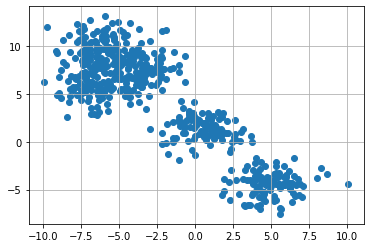

In [168]:
plt.scatter(samples[:,0],samples[:,1])
plt.grid()

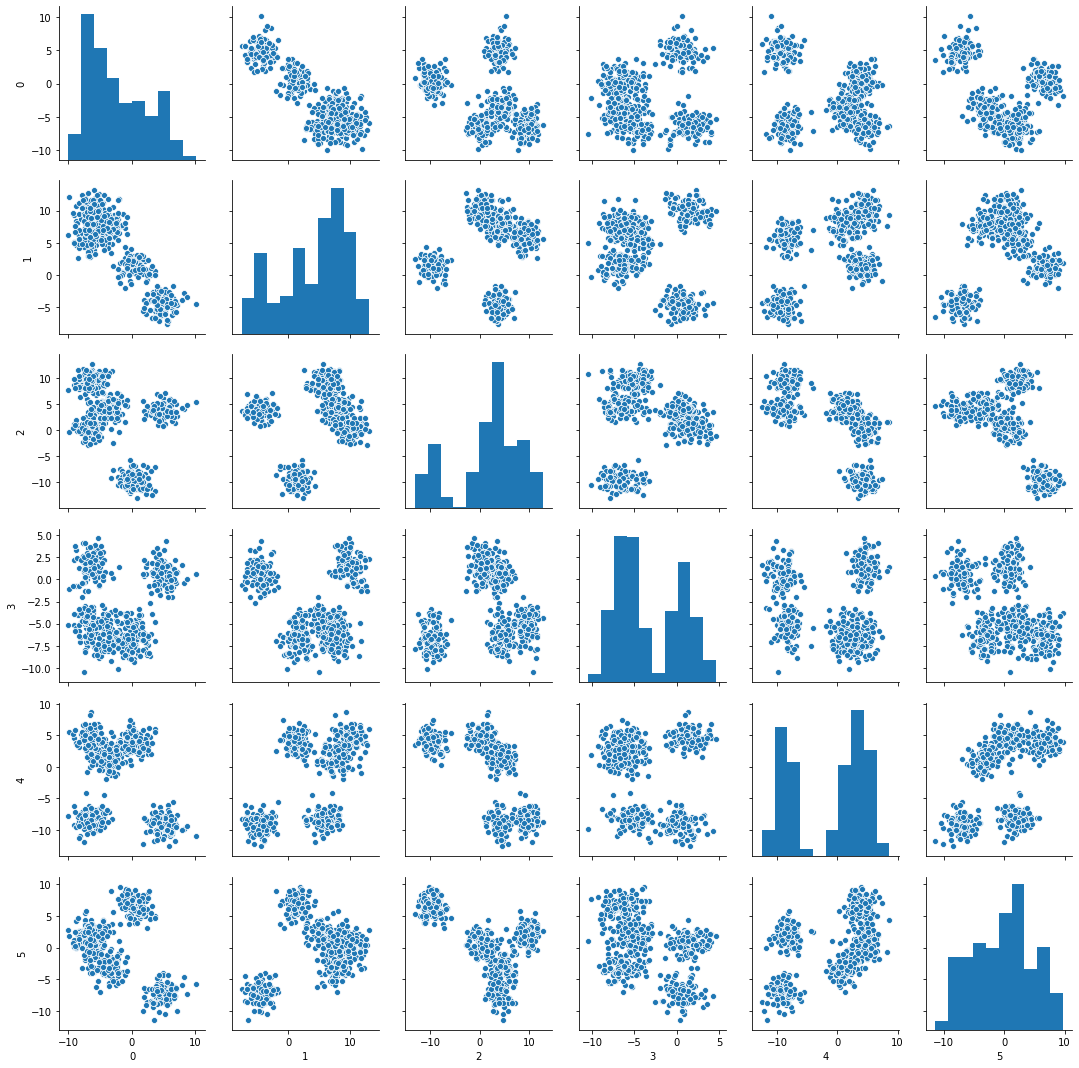

In [169]:
import pandas as pd
sns.pairplot(pd.DataFrame(samples))

We can see the colors because we have the labels

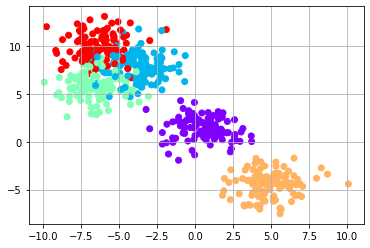

In [170]:
plt.scatter(samples[:,0],samples[:,1],c=label, cmap='rainbow')
plt.grid()

## Creating the Clusters: Kmeans approach

In [171]:
samples.shape

(545, 6)

In [172]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
kmeans.cluster_centers_

array([[ 0.47300146,  1.4173487 , -9.54856265, -6.52219926,  3.87446203,
         6.59461013],
       [ 4.96306193, -4.50683314,  3.802328  ,  0.51685306, -9.09706944,
        -7.23217133],
       [-5.49279536,  7.90158675,  4.78602001, -3.3561602 , -0.80288994,
        -0.08486807]])

In [174]:
kmeans.labels_

array([0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0,

# Calculate the inertia (distorsion) of the clustering

In [175]:
kmeans.inertia_

26958.00811677579

# Which is the optimal cluster number? We use the Elbow method

In [176]:
list_inertias = list()
for num_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(samples)
    list_inertias.append(kmeans.inertia_)

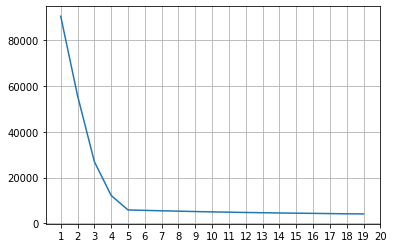

In [183]:
plt.plot(list_inertias)
plt.grid()
plt.xticks(range(0, 20), range(1, 21));

In [178]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

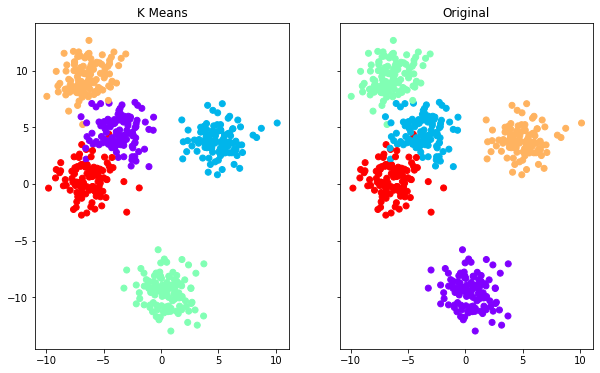

In [179]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(samples[:,0],samples[:,2],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(samples[:,0],samples[:,2],c=data[1],cmap='rainbow')

In [180]:
kmeans.labels_

array([2, 1, 1, 4, 2, 4, 2, 3, 2, 1, 1, 2, 0, 2, 4, 4, 3, 1, 4, 2, 0, 2,
       0, 3, 2, 3, 4, 0, 2, 2, 3, 3, 0, 4, 3, 3, 2, 3, 4, 0, 3, 2, 1, 3,
       1, 2, 3, 1, 0, 3, 1, 3, 1, 4, 4, 2, 1, 2, 0, 2, 4, 2, 3, 3, 2, 0,
       0, 2, 4, 1, 3, 2, 4, 1, 2, 2, 3, 1, 1, 4, 3, 0, 2, 0, 4, 3, 3, 1,
       0, 1, 2, 0, 4, 2, 1, 4, 0, 3, 3, 0, 1, 2, 3, 3, 3, 4, 1, 4, 1, 4,
       3, 3, 4, 1, 0, 4, 4, 3, 0, 2, 4, 3, 4, 0, 3, 3, 4, 1, 1, 0, 2, 4,
       3, 1, 1, 3, 1, 0, 4, 3, 1, 0, 1, 0, 3, 2, 3, 0, 4, 4, 1, 0, 1, 3,
       0, 1, 0, 1, 1, 3, 4, 0, 1, 2, 2, 2, 3, 0, 3, 1, 1, 0, 0, 2, 3, 2,
       3, 2, 0, 2, 3, 0, 3, 4, 2, 2, 1, 3, 1, 0, 1, 2, 0, 2, 3, 4, 0, 1,
       3, 4, 1, 1, 3, 1, 1, 2, 1, 2, 3, 1, 0, 2, 4, 4, 0, 1, 3, 0, 1, 0,
       4, 0, 3, 3, 4, 0, 4, 2, 3, 0, 2, 2, 2, 2, 4, 4, 3, 1, 0, 4, 1, 1,
       4, 2, 2, 4, 0, 3, 0, 3, 2, 2, 1, 4, 2, 0, 4, 2, 2, 0, 0, 4, 3, 3,
       0, 4, 3, 3, 1, 1, 0, 2, 3, 3, 4, 1, 3, 0, 0, 4, 1, 4, 2, 2, 1, 4,
       4, 0, 3, 3, 1, 0, 2, 2, 4, 1, 0, 4, 0, 1, 2,

# Hierarchical Clustering

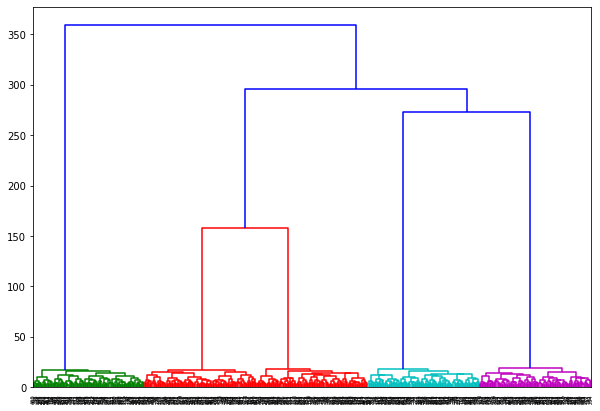

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data[0], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [181]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(samples);

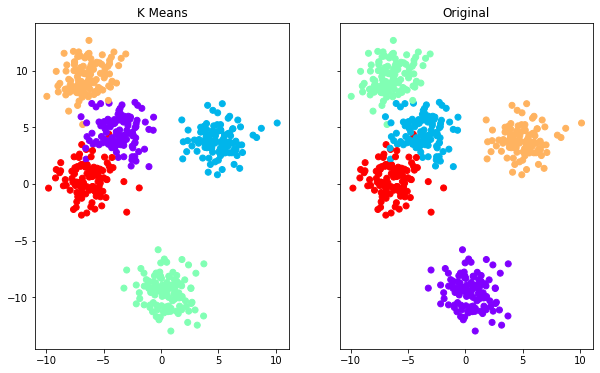

In [182]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(samples[:,0],samples[:,2],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(samples[:,0],samples[:,2],c=data[1],cmap='rainbow')

# Shopping Customers

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
!pwd

/Users/cceriotti/Desktop/Privata/CodingWaves/python3/Clustering


In [3]:
customer_data = pd.read_csv('shopping_data.csv')

In [4]:
customer_data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [5]:
data = customer_data.iloc[:, 3:5].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
scaled_data = st.fit_transform(data)

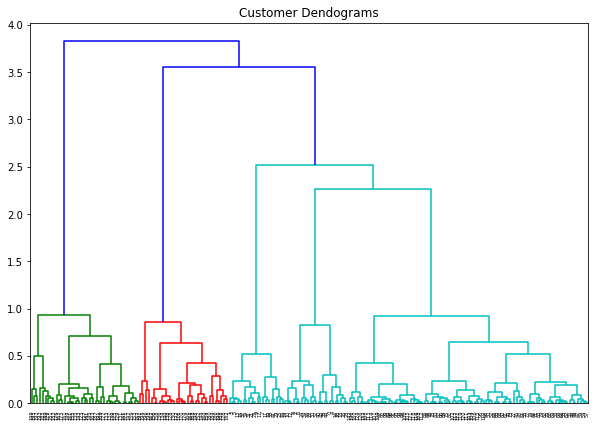

In [16]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

Text(0, 0.5, 'Spending Score')

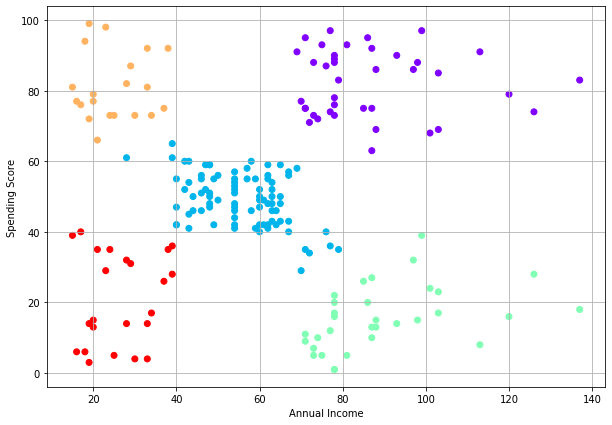

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Example from <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>LINK</a>